In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('new_data.csv')

In [3]:
df

,Unnamed: 0,Open,High,Low,Date,Stock,Close,Change,Change%,Recommendation,...,MFI,MACD,Signal,Region,Exchange,Name,Sector,Industry,Marketcap,InstitutionalHolders
0,0,4.54,4.79,4.42,"Jul 19,2021",ENOB,4.77,0.20,4.38,NaN,...,38.94,-0.04,0.06,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
1,1,4.59,4.67,4.44,"Jul 16,2021",ENOB,4.57,0.01,0.22,NaN,...,33.14,-0.03,0.08,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
2,2,4.78,4.80,4.47,"Jul 15,2021",ENOB,4.56,-0.19,-4.00,NaN,...,23.22,0.00,0.11,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
3,3,4.68,4.90,4.59,"Jul 14,2021",ENOB,4.75,0.04,0.85,NaN,...,31.41,0.03,0.14,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
4,4,5.01,5.08,4.68,"Jul 13,2021",ENOB,4.71,-0.39,-7.65,NaN,...,29.68,0.06,0.17,US,NMS,Enochian Biosciences,Healthcare,Biotechnology,Smallcap,"[{'Blackrock Inc.': '1.73%'}, {'Vanguard Group..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41065,41065,31.93,32.01,31.52,"Jul 26,2019",JD,31.55,-0.28,-0.88,NaN,...,64.44,0.68,0.68,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,"[{'Tiger Global Management, LLC': '3.86%'}, {'..."
41066,41066,32.04,32.38,31.68,"Jul 25,2019",JD,31.83,-0.37,-1.15,Sell,...,62.88,0.70,0.68,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,"[{'Tiger Global Management, LLC': '3.86%'}, {'..."
41067,41067,31.74,32.33,31.60,"Jul 24,2019",JD,32.20,0.35,1.10,Strong Buy,...,63.17,0.69,0.67,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,"[{'Tiger Global Management, LLC': '3.86%'}, {'..."
41068,41068,30.90,31.92,30.84,"Jul 23,2019",JD,31.85,1.19,3.88,Buy,...,55.86,0.63,0.67,US,NMS,JD.com,Consumer Cyclical,Internet Retail,Largecap,"[{'Tiger Global Management, LLC': '3.86%'}, {'..."


In [4]:
#companies we have in the dataset
companies=df['Name'].unique()
print(companies)

['Enochian Biosciences' 'Bassett Furniture Industries, I'
 'Palantir Technologies Inc.' 'Transcat' 'Novavax' 'Cogent Biosciences'
 'Vaxart - Common Stock' 'Pacific Biosciences of Californ' 'Square'
 'ICICI Bank Limited' 'Genesco Inc.' 'Inovio Pharmaceuticals'
 'Owens & Minor' 'Fastly' 'BioCryst Pharmaceuticals' 'Cerus Corporation'
 nan 'Paratek Pharmaceuticals' 'Ocugen' 'Teladoc Health'
 'ArcBest Corporation' 'Jabil Inc.' "Dick's Sporting Goods Inc" "Conn's"
 'Alpha Pro Tech, Ltd.' 'Bioventus Inc.' 'Twilio Inc.' 'Stellantis N.V.'
 'Infosys Limited' 'Microsoft Corporation' 'Organigram Holdings Inc.'
 'Surface Oncology' 'Henry Schein' 'Alteryx' 'Apple Inc.'
 'Evaxion Biotech A/S' 'Zscaler' 'Moderna' 'PVH Corp.' 'Anaplan'
 'Vertex Pharmaceuticals Incorpor' 'Tesla' 'GT Biopharma' 'Co-Diagnostics'
 'Facebook' 'PayPal Holdings' 'LendingClub Corporation' 'Amazon.com'
 'Bill.com Holdings' 'Shopify Inc.' 'Zillow Group'
 'Alibaba Group Holding Limited' 'Intuit Inc.' 'Workday' 'DocuSign'
 'Interc

In [5]:
#let's check if there is any duplicate data
print(df.duplicated().any())
print(df.duplicated().sum())

False
0


In [6]:
# we have Recommendation feature as a target variable, now lets impute
# missing values
print(df['Recommendation'].isnull().sum())

#empty values here that the user should hold the stocks.
#lets will the empty values with "Hold"
df['Recommendation']=df["Recommendation"].fillna("Hold")

32461


In [7]:
df["Recommendation"].value_counts()

Hold           32461
Sell            3687
Buy             2407
Strong Sell     1399
Strong Buy      1116
Name: Recommendation, dtype: int64

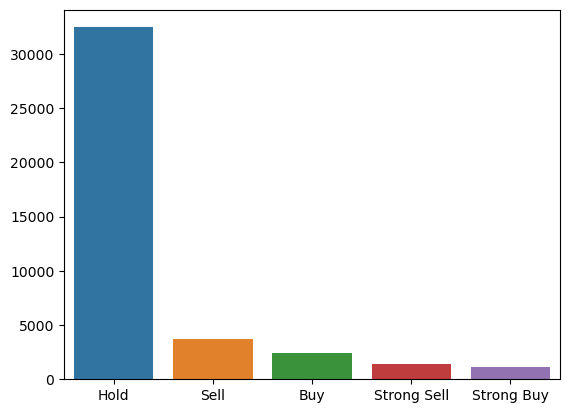

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#Recommendation is our target variable
#Lets see if there is class imbalace or not

a=df['Recommendation'].value_counts()
sns.barplot(x=a.index,y=a.values)
plt.show()

In [9]:
#you have to write a code which tells me the percentage of each class.

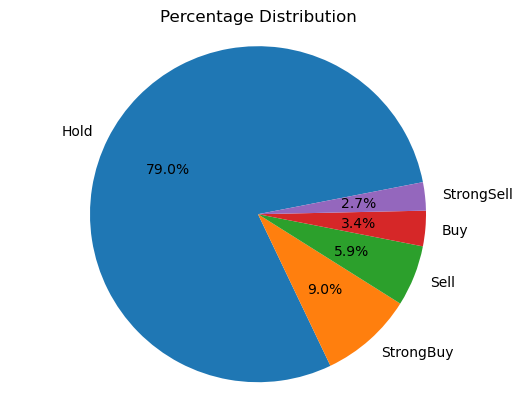

In [10]:

#LETS PLOT THE PIE CHART TO SEE THE DISTRIBUTION
label = 'Hold','StrongBuy','Sell','Buy','StrongSell'

plt.pie(a.values ,labels=label, autopct='%1.1f%%',
        shadow=False, startangle=11)
plt.axis('equal')
plt.title("Percentage Distribution")
plt.show()


In [11]:

#lets check for Healthcare
df1=df[(df['Sector']=='Healthcare') & (df['Recommendation']=='Hold')]
df2=df[(df['Sector']=='Healthcare') & (df['Recommendation']=='Strong Sell')]
df3=df[(df['Sector']=='Healthcare') & (df['Recommendation']=='Sell')]
df4=df[(df['Sector']=='Healthcare') & (df['Recommendation']=='Strong Buy')]
df5=df[(df['Sector']=='Healthcare') & (df['Recommendation']=='Buy')]

# Healthcare and hold

print("% of hold in Healthcare companies =", (df1.shape[0]/14809)*100)

#Healthcare and Strong Sell

print("% of Strong Sell in Healthcare companies =", (df2.shape[0]/14809)*100)

#Healthcare and sell

print("% of Sell in Healthcare companies =", (df3.shape[0]/14809)*100)

#Healthcare and Strong Buy

print("% of Strong Buy in Healthcare companies =", (df4.shape[0]/14809)*100)

#Healthcare and Buy

print("% of Buy in Healthcare companies =", (df5.shape[0]/14809)*100)

% of hold in Healthcare companies = 79.64075899790669
% of Strong Sell in Healthcare companies = 3.10621919103248
% of Sell in Healthcare companies = 8.326017962050104
% of Strong Buy in Healthcare companies = 3.126477142278344
% of Buy in Healthcare companies = 5.800526706732392


In [12]:
df["Date"]

0        Jul 19,2021
1        Jul 16,2021
2        Jul 15,2021
3        Jul 14,2021
4        Jul 13,2021
            ...     
41065    Jul 26,2019
41066    Jul 25,2019
41067    Jul 24,2019
41068    Jul 23,2019
41069    Jul 22,2019
Name: Date, Length: 41070, dtype: object

In [13]:
df["Sector"].value_counts()

Healthcare                14809
Technology                10864
Consumer Cyclical          5533
Financial Services         2515
Industrials                2012
Communication Services     2012
Real Estate                 273
Name: Sector, dtype: int64

In [14]:

#lets check for Healthcare
df1=df[(df['Sector']=='Technology') & (df['Recommendation']=='Hold')]
df2=df[(df['Sector']=='Technology') & (df['Recommendation']=='Strong Sell')]
df3=df[(df['Sector']=='Technology') & (df['Recommendation']=='Sell')]
df4=df[(df['Sector']=='Technology') & (df['Recommendation']=='Strong Buy')]
df5=df[(df['Sector']=='Technology') & (df['Recommendation']=='Buy')]

# Healthcare and hold

print("% of hold in tech companies =", (df1.shape[0]/10864)*100)

#Healthcare and Strong Sell

print("% of Strong Sell in tech companies =", (df2.shape[0]/10864)*100)

#Healthcare and sell

print("% of Sell in tech companies =", (df3.shape[0]/10864)*100)

#Healthcare and Strong Buy

print("% of Strong Buy in tech companies =", (df4.shape[0]/10864)*100)

#Healthcare and Buy

print("% of Buy in tech companies =", (df5.shape[0]/10864)*100)

% of hold in tech companies = 79.03166421207658
% of Strong Sell in tech companies = 3.700294550810015
% of Sell in tech companies = 9.683357879234169
% of Strong Buy in tech companies = 2.3103829160530194
% of Buy in tech companies = 5.274300441826215


In [15]:
df["Sector"].value_counts()
a=df[df["Sector"]=="Technology"].shape
print(a)
print(a[0])

(10864, 27)
10864


# Market Cap

In [16]:
df.columns

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Date', 'Stock', 'Close', 'Change',
       'Change%', 'Recommendation', 'MarketType', 'ADX', 'ADX_Strength', 'DI+',
       'DI-', 'William%R', 'RSI', 'MFI', 'MACD', 'Signal', 'Region',
       'Exchange', 'Name', 'Sector', 'Industry', 'Marketcap',
       'InstitutionalHolders'],
      dtype='object')

In [17]:
market=df["Marketcap"].value_counts()

<Axes: >

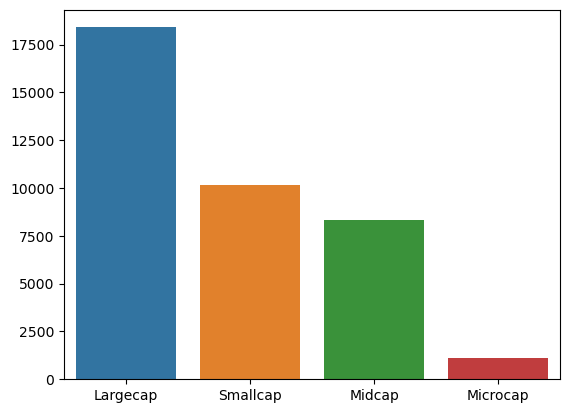

In [18]:
sns.barplot(x=market.index,y=market.values)

([<matplotlib.patches.Wedge at 0x14c237f88d0>,
 [Text(0.054516329981623785, 1.0986482466036775, 'Largecap'),
  Text(-0.8114638025203749, -0.742648299802251, 'Smallcap'),
  Text(0.7071746518770538, -0.8425580168407206, 'Midcap'),
  Text(1.095300682319725, -0.10156975588207683, 'Microcap')],
 [Text(0.029736179989976606, 0.5992626799656422, '48.4%'),
  Text(-0.4426166195565681, -0.4050808908012278, '26.7%'),
  Text(0.3857316282965747, -0.45957710009493846, '21.9%'),
  Text(0.5974367358107591, -0.055401685026587356, '2.9%')])

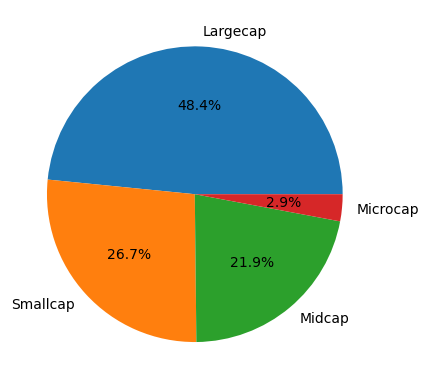

In [19]:
plt.pie(market.values,labels=market.index,autopct="%1.1f%%")

In [20]:
df.columns

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Date', 'Stock', 'Close', 'Change',
       'Change%', 'Recommendation', 'MarketType', 'ADX', 'ADX_Strength', 'DI+',
       'DI-', 'William%R', 'RSI', 'MFI', 'MACD', 'Signal', 'Region',
       'Exchange', 'Name', 'Sector', 'Industry', 'Marketcap',
       'InstitutionalHolders'],
      dtype='object')

In [21]:
df=df.drop(["Unnamed: 0","Exchange","InstitutionalHolders"],axis=1)#we are deleting the columns

In [22]:
df

,Open,High,Low,Date,Stock,Close,Change,Change%,Recommendation,MarketType,...,William%R,RSI,MFI,MACD,Signal,Region,Name,Sector,Industry,Marketcap
0,4.54,4.79,4.42,"Jul 19,2021",ENOB,4.77,0.20,4.38,Hold,UpTrend,...,-70.09,47.82,38.94,-0.04,0.06,US,Enochian Biosciences,Healthcare,Biotechnology,Smallcap
1,4.59,4.67,4.44,"Jul 16,2021",ENOB,4.57,0.01,0.22,Hold,UpTrend,...,-88.70,43.87,33.14,-0.03,0.08,US,Enochian Biosciences,Healthcare,Biotechnology,Smallcap
2,4.78,4.80,4.47,"Jul 15,2021",ENOB,4.56,-0.19,-4.00,Hold,UpTrend,...,-93.08,43.67,23.22,0.00,0.11,US,Enochian Biosciences,Healthcare,Biotechnology,Smallcap
3,4.68,4.90,4.59,"Jul 14,2021",ENOB,4.75,0.04,0.85,Hold,UpTrend,...,-82.40,46.57,31.41,0.03,0.14,US,Enochian Biosciences,Healthcare,Biotechnology,Smallcap
4,5.01,5.08,4.68,"Jul 13,2021",ENOB,4.71,-0.39,-7.65,Hold,UpTrend,...,-85.60,45.87,29.68,0.06,0.17,US,Enochian Biosciences,Healthcare,Biotechnology,Smallcap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41065,31.93,32.01,31.52,"Jul 26,2019",JD,31.55,-0.28,-0.88,Hold,UpTrend,...,-37.39,60.32,64.44,0.68,0.68,US,JD.com,Consumer Cyclical,Internet Retail,Largecap
41066,32.04,32.38,31.68,"Jul 25,2019",JD,31.83,-0.37,-1.15,Sell,UpTrend,...,-24.77,63.59,62.88,0.70,0.68,US,JD.com,Consumer Cyclical,Internet Retail,Largecap
41067,31.74,32.33,31.60,"Jul 24,2019",JD,32.20,0.35,1.10,Strong Buy,UpTrend,...,-5.99,68.11,63.17,0.69,0.67,US,JD.com,Consumer Cyclical,Internet Retail,Largecap
41068,30.90,31.92,30.84,"Jul 23,2019",JD,31.85,1.19,3.88,Buy,UpTrend,...,-3.98,65.99,55.86,0.63,0.67,US,JD.com,Consumer Cyclical,Internet Retail,Largecap


In [23]:
data=df

In [24]:
data["William%R"].isna().sum()
#we need to remove the null values
#we can impute the null values

105

In [25]:
data["William%R"]=data["William%R"].dropna()

In [26]:
data.isna().sum()

Open                 0
High                 0
Low                  0
Date                 0
Stock                0
Close                0
Change               9
Change%              9
Recommendation       0
MarketType          16
ADX                 16
ADX_Strength       440
DI+                  0
DI-                  0
William%R          105
RSI                  0
MFI                105
MACD                 0
Signal               0
Region            3052
Name              3052
Sector            3052
Industry          3052
Marketcap         3052
dtype: int64

In [27]:
data.dropna(inplace=True)

# william%r

mean of the feature 'William%R' is  -46.95740075940628
median of feature 'William%R' is  -45.24
75th percentile for william%R is  -19.77
25th percentile for william%r is  -73.82
75th percentile for hold is  -21.62
25th percentile for hold is  -72.22
75th percentile for strong sell is -12.14
25th percentile for strong sell is  -69.32
75th percentile for sell is  -12.28
25th percentile for sell is  -37.349999999999994
75th percentile for Buy is  -74.4
25th percentile for Buy is  -91.95
75th percentile for Strong Buy is  -12.36
25th percentile for Strong Buy is  -76.47


C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nikit\anaconda3\Lib\s

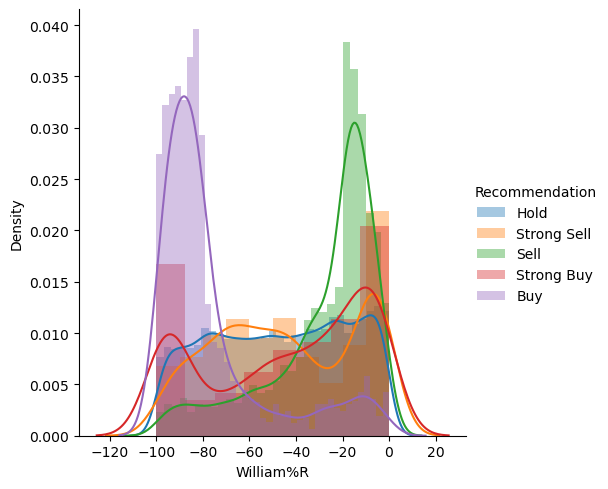

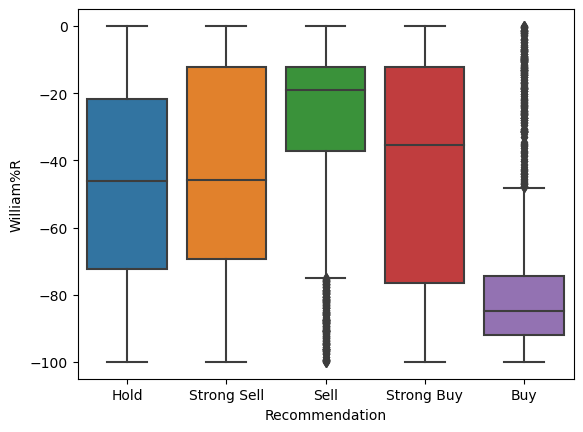

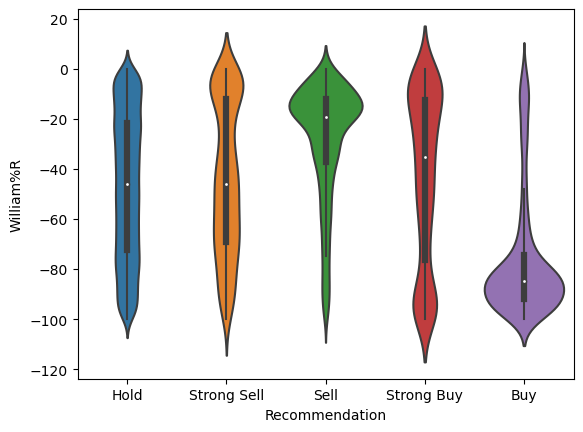

In [28]:
#histogram
#box plot
#pdf
#violin plot
# feature william%R
a=np.mean(data['William%R'])

print("mean of the feature 'William%R' is ",a)
b=np.median(data['William%R'])
print("median of feature 'William%R' is ",b)

sa=data.loc[data['Recommendation']=='Hold']
sb=data.loc[data['Recommendation']=='Strong Sell']
sc=data.loc[data['Recommendation']=='Sell']
sd=data.loc[data['Recommendation']=='Buy']
se=data.loc[data['Recommendation']=='Strong Buy']


y=np.percentile(data['William%R'],75)
print("75th percentile for william%R is ",y)

z=np.percentile(data['William%R'],25)
print("25th percentile for william%r is ",z)


c=np.percentile(sa['William%R'],75)
print("75th percentile for hold is ",c)

n=np.percentile(sa['William%R'],25)
print("25th percentile for hold is ",n)

d=np.percentile(sb['William%R'],75)
print("75th percentile for strong sell is",d)

e=np.percentile(sb['William%R'],25)
print("25th percentile for strong sell is ",e)

f=np.percentile(sc['William%R'],75)
print("75th percentile for sell is ",f)

g=np.percentile(sc['William%R'],25)
print("25th percentile for sell is ",g)

h=np.percentile(sd['William%R'],75)
print("75th percentile for Buy is ",h)

i=np.percentile(sd['William%R'],25)
print("25th percentile for Buy is ",i)

j=np.percentile(se['William%R'],75)
print("75th percentile for Strong Buy is ",j)

k=np.percentile(se['William%R'],25)
print("25th percentile for Strong Buy is ",k)


sns.FacetGrid(data, hue="Recommendation", height=5) \
   .map(sns.distplot, 'William%R',kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Recommendation',y='William%R', data=data)
plt.show()

sns.violinplot(x='Recommendation', y='William%R', data=data)
plt.show()

In [29]:
data.shape

(37661, 24)

In [30]:
apple_stock=df[df["Stock"]=="AAPL"]
apple_stock

,Open,High,Low,Date,Stock,Close,Change,Change%,Recommendation,MarketType,...,William%R,RSI,MFI,MACD,Signal,Region,Name,Sector,Industry,Marketcap
17316,143.75,144.07,141.67,"Jul 19,2021",AAPL,142.45,-3.94,-2.69,Hold,UpTrend,...,-48.24,58.19,66.87,4.27,4.11,US,Apple Inc.,Technology,Consumer Electronics,Largecap
17317,148.46,149.76,145.88,"Jul 16,2021",AAPL,146.39,-2.09,-1.41,Hold,UpTrend,...,-21.68,70.18,74.93,4.72,4.07,US,Apple Inc.,Technology,Consumer Electronics,Largecap
17318,149.24,150.00,147.09,"Jul 15,2021",AAPL,148.48,-0.67,-0.45,Sell,UpTrend,...,-8.84,78.12,76.78,4.81,3.91,US,Apple Inc.,Technology,Consumer Electronics,Largecap
17319,148.10,149.57,147.68,"Jul 14,2021",AAPL,149.15,3.51,2.41,Hold,UpTrend,...,-2.51,80.84,79.85,4.65,3.68,US,Apple Inc.,Technology,Consumer Electronics,Largecap
17320,144.03,147.46,143.63,"Jul 13,2021",AAPL,145.64,1.14,0.79,Hold,UpTrend,...,-12.42,76.93,78.45,4.32,3.44,US,Apple Inc.,Technology,Consumer Electronics,Largecap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17814,51.87,52.43,51.78,"Jul 26,2019",AAPL,51.94,0.18,0.35,Hold,Trading,...,-17.95,61.17,59.72,0.78,0.77,US,Apple Inc.,Technology,Consumer Electronics,Largecap
17815,52.22,52.31,51.68,"Jul 25,2019",AAPL,51.76,-0.41,-0.79,Hold,Trading,...,-20.30,60.06,51.19,0.79,0.76,US,Apple Inc.,Technology,Consumer Electronics,Largecap
17816,51.92,52.29,51.79,"Jul 24,2019",AAPL,52.17,-0.04,-0.08,Hold,Trading,...,-4.46,63.93,57.18,0.81,0.76,US,Apple Inc.,Technology,Consumer Electronics,Largecap
17817,52.12,52.23,51.82,"Jul 23,2019",AAPL,52.21,0.40,0.77,Hold,Trading,...,-0.76,64.30,62.46,0.78,0.75,US,Apple Inc.,Technology,Consumer Electronics,Largecap


In [31]:
import numpy as np
mean_of_apple_stock=np.mean(apple_stock["Open"])
print(mean_of_apple_stock)

median=np.median(apple_stock["Open"])
print(median)

96.55083499005964
96.26


In [32]:
std=np.std(apple_stock["Open"])
print(std)

29.864577648276693


mean of the feature 'RSI' is  52.857560340936246
median of feature 'RSI' is  52.67
75th percentile for change% is  61.41
25th percentile for change% is  44.38
75th percentile for hold is  61.11
25th percentile for hold is  45.12
75th percentile for strong sell is 68.19
25th percentile for strong sell is  50.45
75th percentile for sell is  64.13
25th percentile for sell is  52.52
75th percentile for Buy is  43.3075
25th percentile for Buy is  35.7975
75th percentile for Strong Buy is  64.655
25th percentile for Strong Buy is  32.945


C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nikit\anaconda3\Lib\s

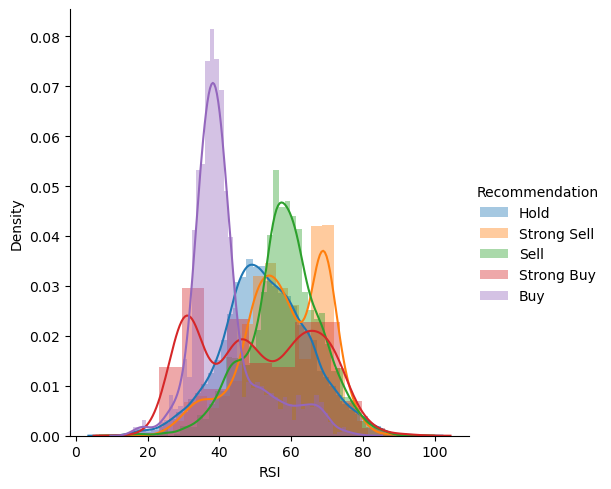

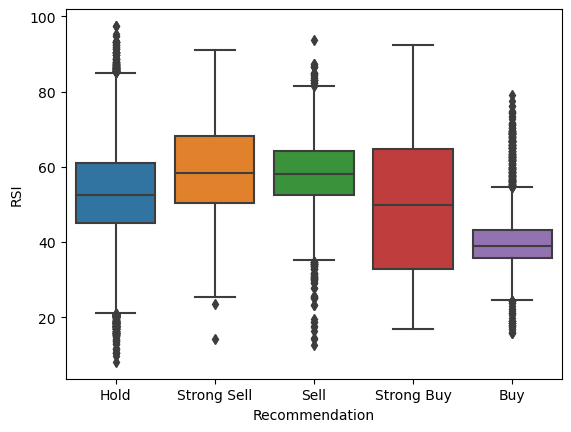

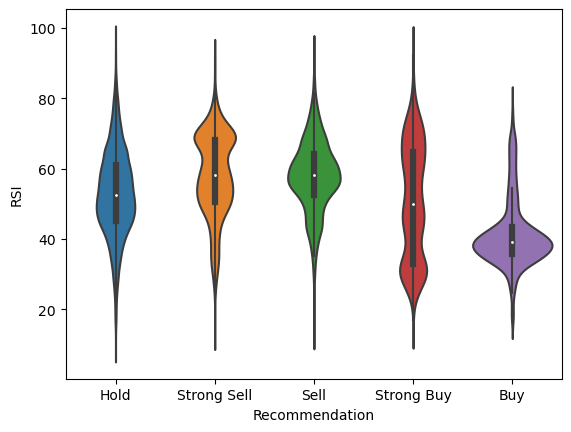

In [33]:
# feature RSI
a=np.mean(data['RSI'])

print("mean of the feature 'RSI' is ",a)
b=np.median(data['RSI'])
print("median of feature 'RSI' is ",b)

sa=data.loc[data['Recommendation']=='Hold']
sb=data.loc[data['Recommendation']=='Strong Sell']
sc=data.loc[data['Recommendation']=='Sell']
sd=data.loc[data['Recommendation']=='Buy']
se=data.loc[data['Recommendation']=='Strong Buy']


y=np.percentile(data['RSI'],75)
print("75th percentile for change% is ",y)

z=np.percentile(data['RSI'],25)
print("25th percentile for change% is ",z)


c=np.percentile(sa['RSI'],75)
print("75th percentile for hold is ",c)

n=np.percentile(sa['RSI'],25)
print("25th percentile for hold is ",n)

d=np.percentile(sb['RSI'],75)
print("75th percentile for strong sell is",d)

e=np.percentile(sb['RSI'],25)
print("25th percentile for strong sell is ",e)

f=np.percentile(sc['RSI'],75)
print("75th percentile for sell is ",f)

g=np.percentile(sc['RSI'],25)
print("25th percentile for sell is ",g)

h=np.percentile(sd['RSI'],75)
print("75th percentile for Buy is ",h)

i=np.percentile(sd['RSI'],25)
print("25th percentile for Buy is ",i)

j=np.percentile(se['RSI'],75)
print("75th percentile for Strong Buy is ",j)

k=np.percentile(se['RSI'],25)
print("25th percentile for Strong Buy is ",k)


sns.FacetGrid(data, hue="Recommendation", height=5) \
   .map(sns.distplot, 'RSI',kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Recommendation',y='RSI', data=data)
plt.show()

sns.violinplot(x='Recommendation', y='RSI', data=data)
plt.show()



mean of the feature 'ADX' is  25.22447784179921
median of feature 'ADX' is  23.13
75th percentile for ADX is  31.31
25th percentile for ADX is  17.39
75th percentile for hold is  31.26
25th percentile for hold is  17.28
75th percentile for strong sell is 34.3
25th percentile for strong sell is  19.18
75th percentile for sell is  32.43
25th percentile for sell is  18.15
75th percentile for Buy is  27.5225
25th percentile for Buy is  15.84
75th percentile for Strong Buy is  32.08
25th percentile for Strong Buy is  20.4


C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nikit\anaconda3\Lib\s

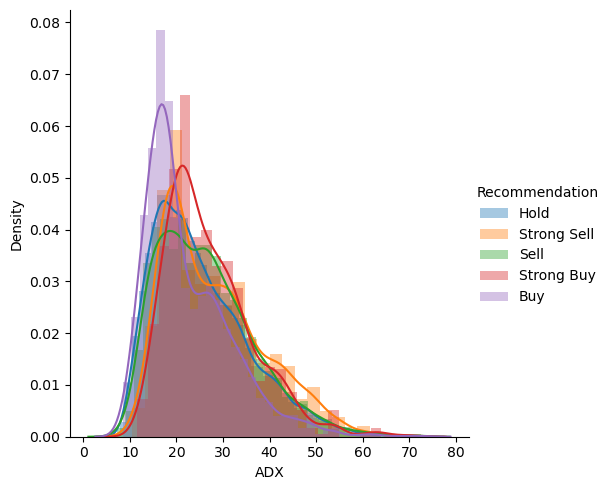

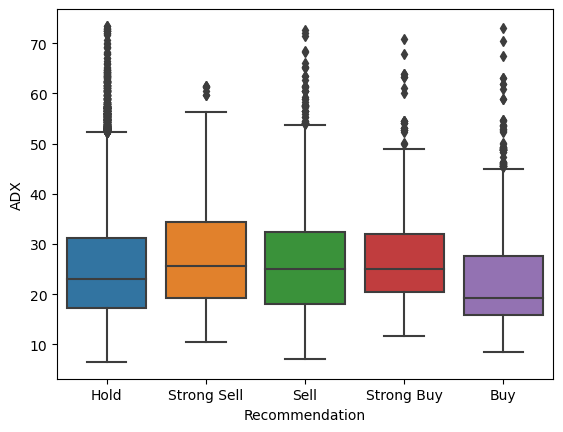

<Axes: xlabel='Recommendation', ylabel='ADX'>

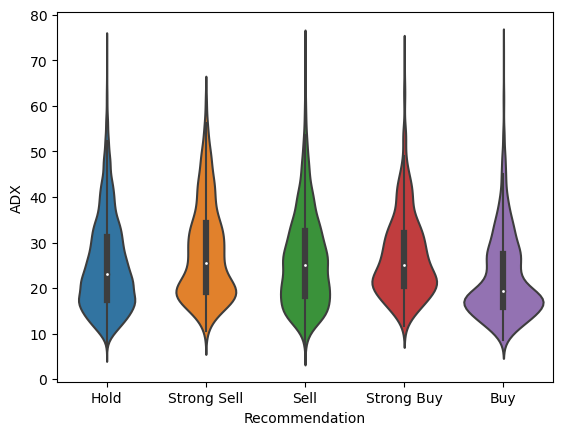

In [34]:
a=np.mean(data['ADX'])

print("mean of the feature 'ADX' is ",a)
b=np.median(data['ADX'])
print("median of feature 'ADX' is ",b)

sa=data.loc[data['Recommendation']=='Hold']
sb=data.loc[data['Recommendation']=='Strong Sell']
sc=data.loc[data['Recommendation']=='Sell']
sd=data.loc[data['Recommendation']=='Buy']
se=data.loc[data['Recommendation']=='Strong Buy']


y=np.percentile(data['ADX'],75)
print("75th percentile for ADX is ",y)

z=np.percentile(data['ADX'],25)
print("25th percentile for ADX is ",z)


c=np.percentile(sa['ADX'],75)
print("75th percentile for hold is ",c)

n=np.percentile(sa['ADX'],25)
print("25th percentile for hold is ",n)

d=np.percentile(sb['ADX'],75)
print("75th percentile for strong sell is",d)

e=np.percentile(sb['ADX'],25)
print("25th percentile for strong sell is ",e)

f=np.percentile(sc['ADX'],75)
print("75th percentile for sell is ",f)

g=np.percentile(sc['ADX'],25)
print("25th percentile for sell is ",g)

h=np.percentile(sd['ADX'],75)
print("75th percentile for Buy is ",h)

i=np.percentile(sd['ADX'],25)
print("25th percentile for Buy is ",i)

j=np.percentile(se['ADX'],75)
print("75th percentile for Strong Buy is ",j)

k=np.percentile(se['ADX'],25)
print("25th percentile for Strong Buy is ",k)


sns.FacetGrid(data, hue="Recommendation", height=5) \
   .map(sns.distplot, 'ADX',kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Recommendation',y='ADX', data=data)
plt.show()

sns.violinplot(x='Recommendation', y='ADX', data=data)

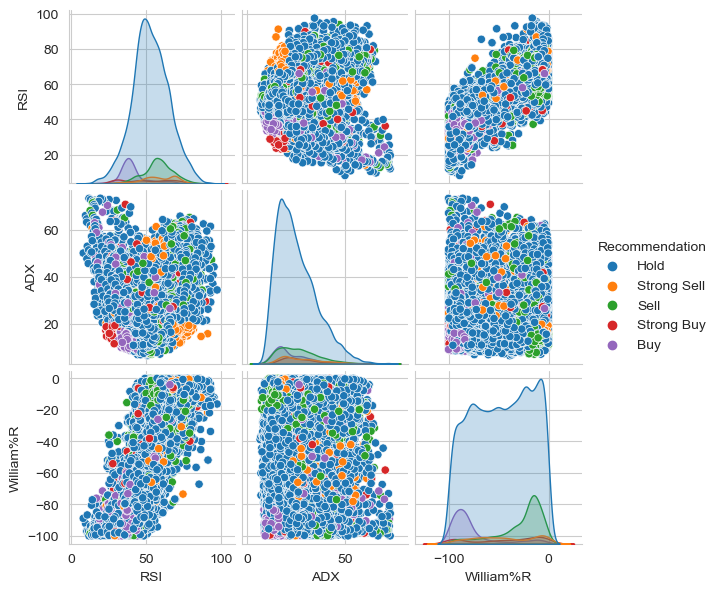

In [35]:
#Pair Plot (RSI, ADX AND WILLIAM%R)

data2=data[['RSI','ADX','William%R','Recommendation']]

sns.set_style("whitegrid");
sns.pairplot(data2,hue='Recommendation', height=2);
plt.show()

C:\Users\nikit\AppData\Local\Temp\ipykernel_6404\3256540887.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

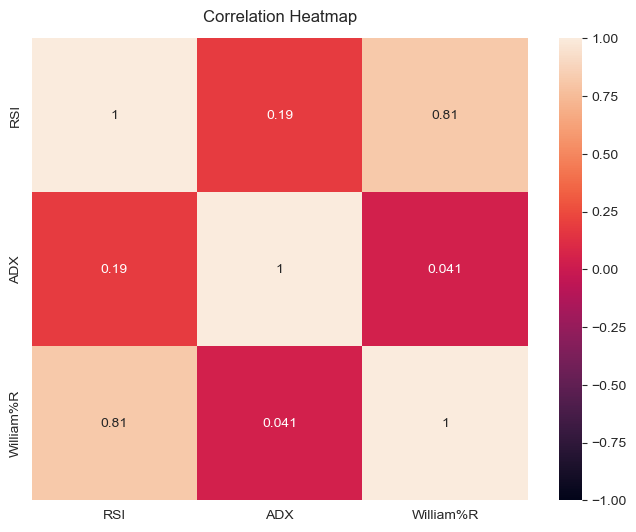

In [36]:
# Let's find out correlation between RSI, ADX AND William%R
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

mean of the feature 'MACD' is  1.4418140782241575
median of feature 'MACD' is  0.19


C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nikit\anaconda3\Lib\s

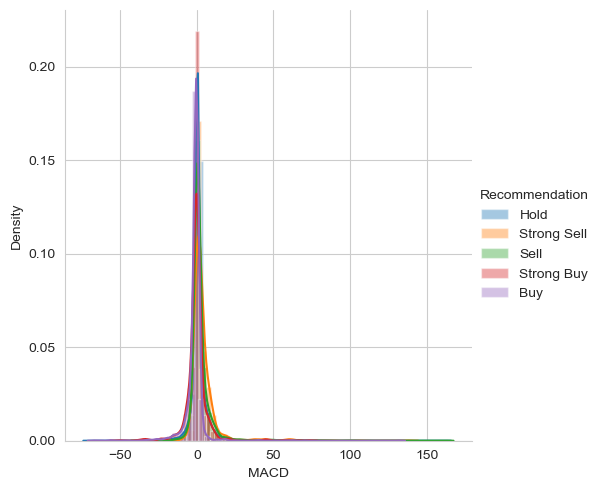

C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


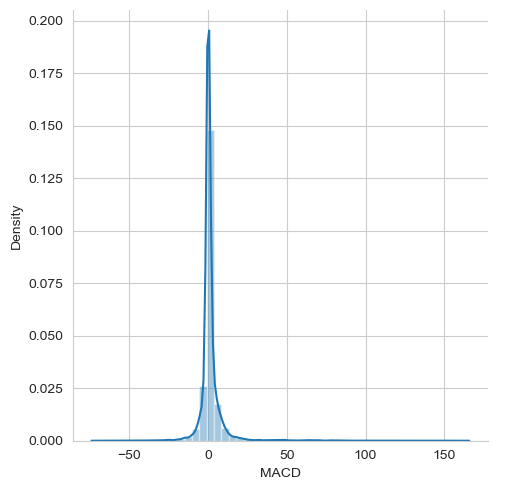

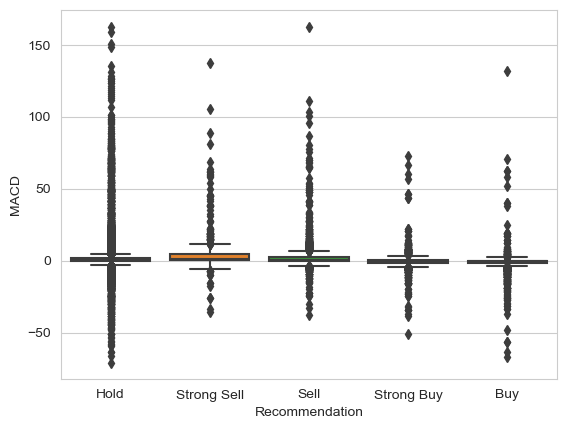

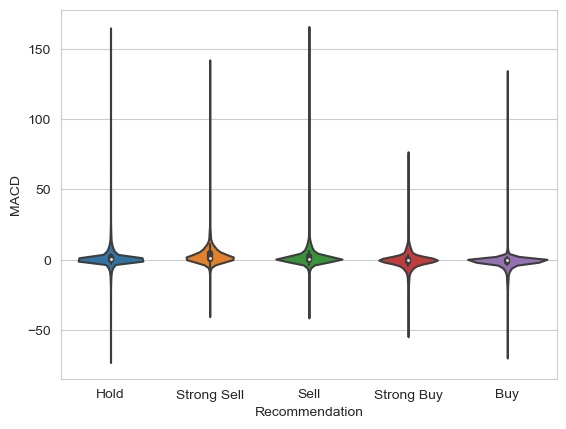

In [37]:
#FEATURE MACD
a=np.mean(data['MACD'])

print("mean of the feature 'MACD' is ",a)
b=np.median(data['MACD'])
print("median of feature 'MACD' is ",b)



sns.FacetGrid(data, hue="Recommendation", height=5) \
   .map(sns.distplot, 'MACD',kde=True) \
   .add_legend()
plt.show()


sns.FacetGrid(data, height=5) \
   .map(sns.distplot, 'MACD',kde=True) \
   .add_legend()
plt.show()

sns.boxplot(x='Recommendation',y='MACD', data=data)
plt.show()

sns.violinplot(x='Recommendation', y='MACD', data=data)
plt.show()

In [38]:
data.shape
data.columns

Index(['Open', 'High', 'Low', 'Date', 'Stock', 'Close', 'Change', 'Change%',
       'Recommendation', 'MarketType', 'ADX', 'ADX_Strength', 'DI+', 'DI-',
       'William%R', 'RSI', 'MFI', 'MACD', 'Signal', 'Region', 'Name', 'Sector',
       'Industry', 'Marketcap'],
      dtype='object')

In [39]:
y=data["Recommendation"]


In [40]:
X=data.iloc[:,0:24] #features
#data.iloc["no of rows","no of columns"]
#data.iloc[0:3,0:4] slice 3 rowrs from the entire data dn starting 4 columns from the entired data.
X.columns

Index(['Open', 'High', 'Low', 'Date', 'Stock', 'Close', 'Change', 'Change%',
       'Recommendation', 'MarketType', 'ADX', 'ADX_Strength', 'DI+', 'DI-',
       'William%R', 'RSI', 'MFI', 'MACD', 'Signal', 'Region', 'Name', 'Sector',
       'Industry', 'Marketcap'],
      dtype='object')

In [41]:
X.drop(["Recommendation","Date","Name","Sector","Industry","Region","Marketcap","ADX_Strength","MarketType","Stock"],axis=1,inplace=True)

In [42]:
X

,Open,High,Low,Close,Change,Change%,ADX,DI+,DI-,William%R,RSI,MFI,MACD,Signal
0,4.54,4.79,4.42,4.77,0.20,4.38,47.12,34.02,16.34,-70.09,47.82,38.94,-0.04,0.06
1,4.59,4.67,4.44,4.57,0.01,0.22,48.05,34.11,17.27,-88.70,43.87,33.14,-0.03,0.08
2,4.78,4.80,4.47,4.56,-0.19,-4.00,49.22,35.27,17.42,-93.08,43.67,23.22,0.00,0.11
3,4.68,4.90,4.59,4.75,0.04,0.85,50.40,36.95,16.52,-82.40,46.57,31.41,0.03,0.14
4,5.01,5.08,4.68,4.71,-0.39,-7.65,51.34,38.55,15.97,-85.60,45.87,29.68,0.06,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41065,31.93,32.01,31.52,31.55,-0.28,-0.88,28.41,34.82,17.37,-37.39,60.32,64.44,0.68,0.68
41066,32.04,32.38,31.68,31.83,-0.37,-1.15,28.02,36.44,16.66,-24.77,63.59,62.88,0.70,0.68
41067,31.74,32.33,31.60,32.20,0.35,1.10,27.31,38.36,17.75,-5.99,68.11,63.17,0.69,0.67
41068,30.90,31.92,30.84,31.85,1.19,3.88,26.58,37.15,18.96,-3.98,65.99,55.86,0.63,0.67


In [43]:
X.columns #feature names

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Change%', 'ADX', 'DI+',
       'DI-', 'William%R', 'RSI', 'MFI', 'MACD', 'Signal'],
      dtype='object')

In [44]:
y #this is the target variable
y.value_counts()

Hold           29773
Sell            3372
Buy             2220
Strong Sell     1285
Strong Buy      1011
Name: Recommendation, dtype: int64

In [45]:
#spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [46]:
print(X_train.shape)
print(y_train.shape)

(26362, 14)
(26362,)


In [47]:
print(X_test.shape)
print(y_test.shape)

(11299, 14)
(11299,)


In [48]:
y_train.value_counts()

Hold           20803
Sell            2380
Buy             1565
Strong Sell      906
Strong Buy       708
Name: Recommendation, dtype: int64

# Modelling...

In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings("ignore")


# Logistic

In [50]:
#logistic equation-->
#we want to find a line, plane,hyperplane which minimizes the (log loss + lambda*regularization term)

#linear
#we want to find a line, plane, hyperplane which minimizes (squared loss+ lambda*regularization term)

#svm
#we want to find a line, plane, hyperplane which minimizes are hinge loss* 1/c*regulaization time

#lambda is inversely proportional to 1/c.


tuned_parameters=[{'C':[10**-6,10**-5,10**-4,10**-2,10**0]}]

LRmodel=GridSearchCV(LogisticRegression(class_weight="balanced",max_iter=400),tuned_parameters)

LRmodel.fit(X_train,y_train)

print(LRmodel.best_estimator_)
print(LRmodel.score(X_test,y_test))

LogisticRegression(C=1, class_weight='balanced', max_iter=400)
0.2315249137091778


In [51]:
#predictions
LR_test_prediction=LRmodel.predict(X_test)
LR_train_predictions=LRmodel.predict(X_train)

In [52]:
#evaluation of Logistic Regression without smote
from sklearn.metrics import f1_score
X_lrtest_F1score=f1_score(y_test,LR_test_prediction,average='weighted')
print("Testing f1 score is",X_lrtest_F1score) #f1 score on test data

X_lrtrain_F1score=f1_score(y_train,LR_train_predictions,average='weighted')
print("Training f1 score is",X_lrtrain_F1score) #f1 score on train data

Testing f1 score is 0.22965389079301798
Training f1 score is 0.2364011412504434


# Random Forest

In [53]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,300, 500],
    'max_depth' : [4,5,6]
}
rfc3=RandomForestClassifier(class_weight='balanced',random_state=42)
#here parameter class_weight='balanced' will balance the class imbalances

grid_searchcw = GridSearchCV(estimator = rfc3, param_grid = param_grid,
                          cv = 3, n_jobs = -1)


In [54]:
grid_searchcw.fit(X_train, y_train)
print(grid_searchcw.best_params_)

{'max_depth': 6, 'n_estimators': 200}


In [55]:
print(grid_searchcw.score(X_test,y_test))

0.4532259491990442


In [56]:
#training rf with tuned parameters(only class weights)
from sklearn.ensemble import RandomForestClassifier
rfc3=RandomForestClassifier(class_weight='balanced',criterion= 'entropy', max_depth= 6, max_features= 'auto', n_estimators=200,random_state=42)
random_forest_modelcw=rfc3.fit(X_train,y_train)

In [57]:
X_test_predictcw=random_forest_modelcw.predict(X_test)
X_train_predictcw=random_forest_modelcw.predict(X_train)

In [58]:
#class weights
from sklearn.metrics import f1_score
X_test_F1score=f1_score(y_test,X_test_predictcw,average='weighted')
print("Test F1 score for random forest is",X_test_F1score) #f1 score on test data

X_train_F1score=f1_score(y_train,X_train_predictcw,average='weighted')

Test F1 score for random forest is 0.5012549893975987


# KNN

In [59]:
#applying knn

# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN classifier

hyper_parameter_k=[{'n_neighbors':[3,5,7,9]}]
clf= KNeighborsClassifier()
modelknn=GridSearchCV(clf,hyper_parameter_k,scoring='accuracy')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print("training accuracy is",modelknn.score(X_train,y_train))
print("testing accuracy is ",modelknn.score(X_test,y_test))
# Fit the classifier to the data

KNeighborsClassifier(n_neighbors=9)
training accuracy is 0.829185949472726
testing accuracy is  0.8165324364988052


In [60]:
X_test_predictknn=modelknn.predict(X_test)
X_train_predictknn=modelknn.predict(X_train)

In [61]:
#class weights
from sklearn.metrics import f1_score
X_test_F1score=f1_score(y_test,X_test_predictknn,average='weighted')
print("Test F1 score for random forest is",X_test_F1score) #f1 score on test data

X_train_F1score=f1_score(y_train,X_train_predictknn,average='weighted')

Test F1 score for random forest is 0.7733329518925091


# Deision Tree

In [62]:
# Decision tree
from sklearn import tree
tuned_parameters=[{'max_depth':[4,5,6],
                   "min_samples_split":[4,5,6]}]

clf = tree.DecisionTreeClassifier(class_weight='balanced',min_samples_split=5,random_state=42)


model=GridSearchCV(clf,tuned_parameters)

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=4, random_state=42)
0.5127002389591999
0.5237463014945756


In [63]:
#predictions
dt_predictions_test=model.predict(X_test)
dt_predictions_train=model.predict(X_train)

In [64]:
from sklearn.metrics import f1_score
X_test_F1score_dt=f1_score(y_test,dt_predictions_test,average='weighted')
print("Test F1 score for decision tree is",X_test_F1score_dt) #f1 score on test data

Test F1 score for decision tree is 0.5711646545796445


# SVM

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', decision_function_shape='ovr',class_weight="balanced")

# Train the classifier
svc_model=svm_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = svm_classifier.predict(X_test)


print(svc_model.score(X_test,y_test))
print(svc_model.score(X_train,y_train))

X_test_predictcw=svc_model.predict(X_test)
X_train_predictcw=svc_model.predict(X_train)


#class weights
from sklearn.metrics import f1_score
X_test_F1score=f1_score(y_test,X_test_predictcw, average='weighted')
print("Test F1 score for decision tree  is",X_test_F1score) #f1 score on test data

X_train_F1score=f1_score(y_train,X_train_predictcw,average='weighted')

0.2024072926807682
0.21011304149912755
Test F1 score for decision tree  is 0.17816405306011587


# GBDT

In [67]:
pip install xgboost


                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta

In [68]:
import os
from xgboost import XGBClassifier
from sklearn.utils import class_weight
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train)

#training the gbdt model with tuned parameters and class weight
gbdtcw=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='mlogloss',
              gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=4, missing=None, n_estimators=300, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1,seed=27, silent=None, subsample=0.8, verbosity=1)


In [69]:
X_train_array=X_train.values
y_train_array=y_train.values
X_test_array=X_test.values
y_test_array=y_test.values

In [70]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform on the training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the test data
y_test_encoded = label_encoder.transform(y_test)


In [71]:
gbdt_modelcw = gbdtcw.fit(X_train_array, y_train_encoded, sample_weight=classes_weights)
